In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Visualisation Datasets/heart.csv.xls')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
target = 'HeartDisease'

In [ ]:
for col in data.columns:
  print(f'unique({col}) = {len(data[col].unique())}')

unique(Age) = 50
unique(Sex) = 2
unique(ChestPainType) = 4
unique(RestingBP) = 67
unique(Cholesterol) = 222
unique(FastingBS) = 2
unique(RestingECG) = 3
unique(MaxHR) = 119
unique(ExerciseAngina) = 2
unique(Oldpeak) = 53
unique(ST_Slope) = 3
unique(HeartDisease) = 2


In [ ]:
def visualiseHistograms(data: pd.DataFrame, visualizableFields = []):
  n = len(visualizableFields)
  n = n // 2 + (n % 2 != 0)

  plt.figure(figsize = (10, 12))

  for idx, value in enumerate(visualizableFields):
    plt.subplot(n, 2, idx+1)
    data[value].hist()
    plt.title(f"{value} Distribution")
    plt.tight_layout(pad=2)

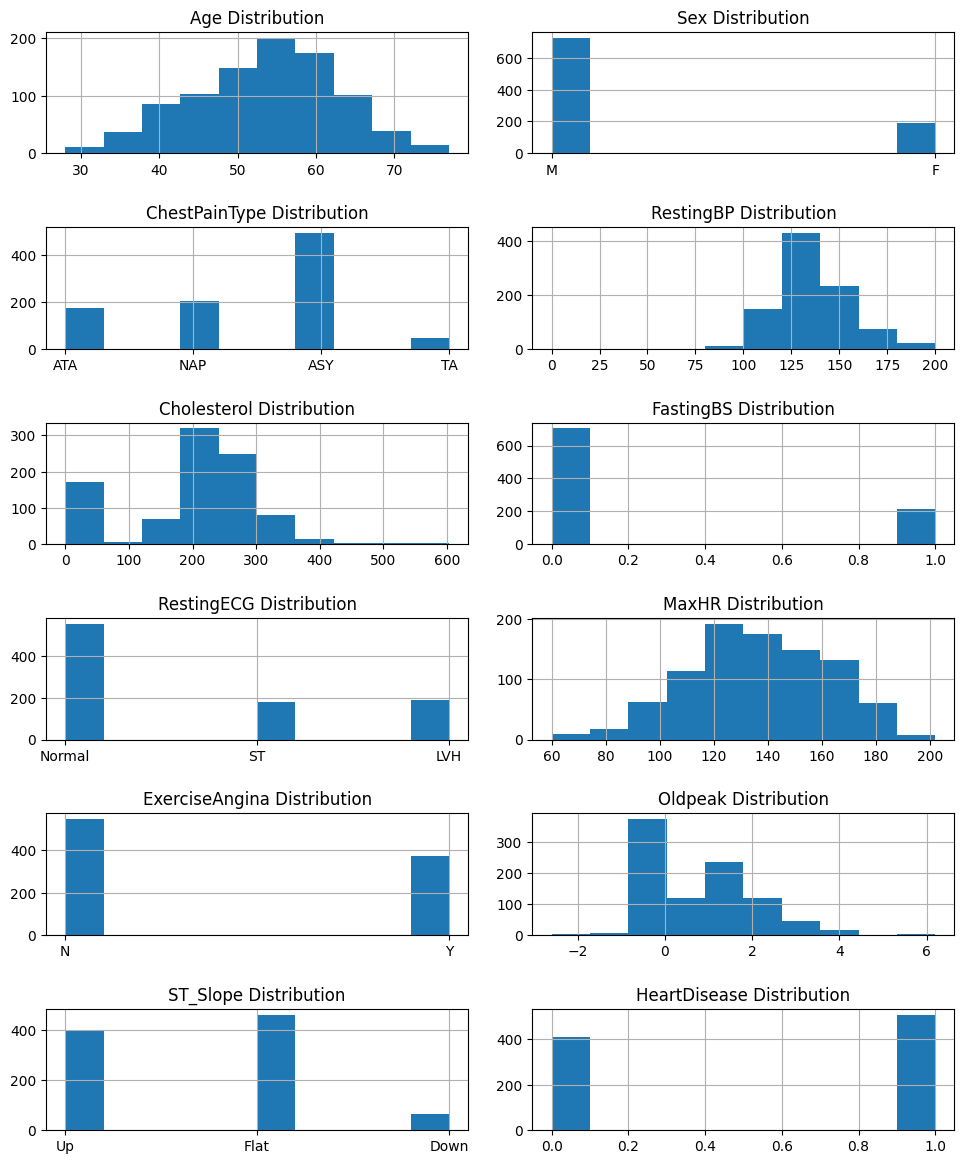

In [ ]:
visualiseHistograms(data, data.columns)

In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
def visualizeData(data: pd.DataFrame, visualizableFields = []):
  n = len(visualizableFields)
  n = n // 2 + (n % 2 != 0)

  plt.figure(figsize = (10, 12))

  for idx, value in enumerate(visualizableFields):
    plt.subplot(n, 2, idx+1)
    sns.countplot(x=value, hue=target, data=data, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()

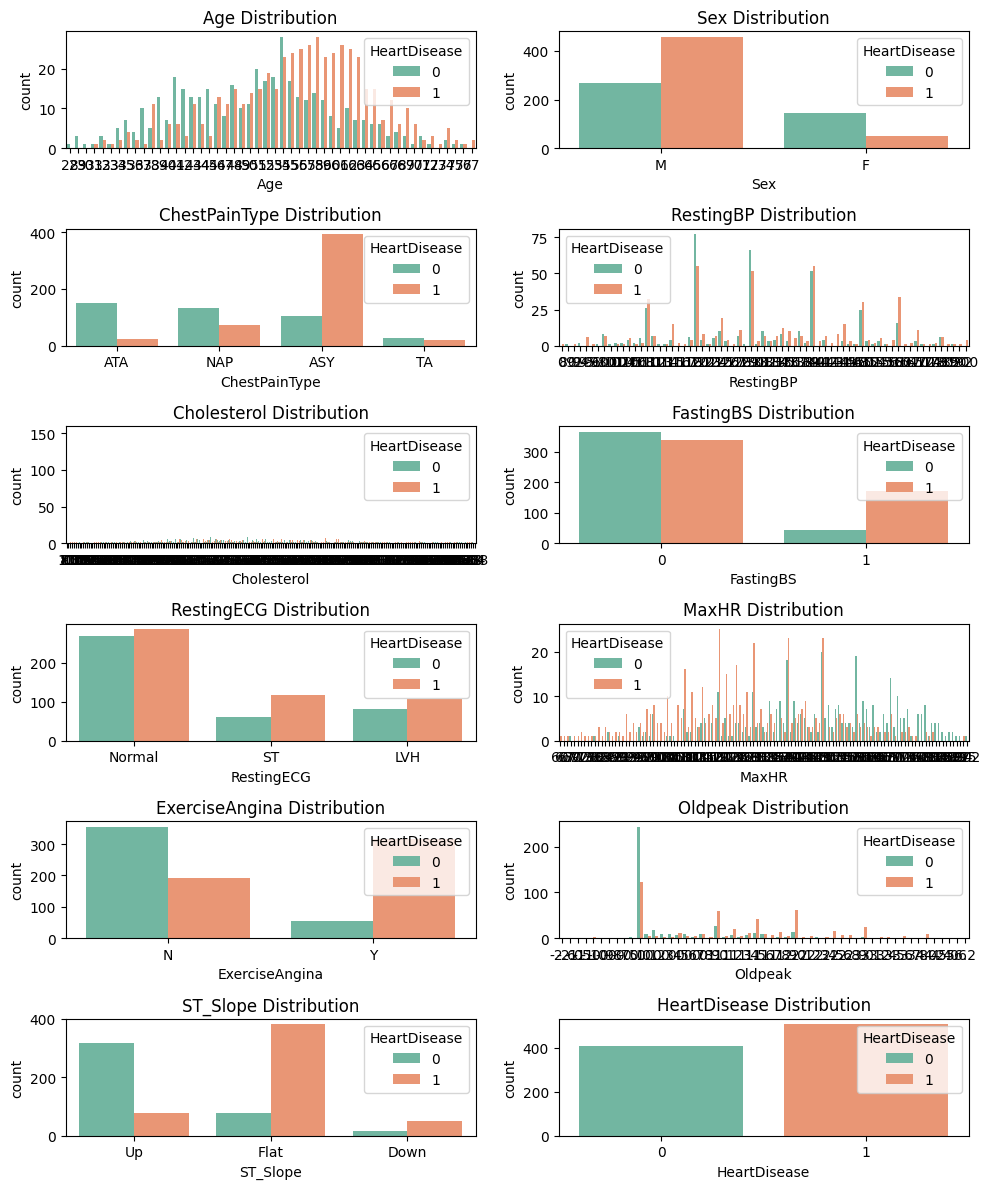

In [ ]:
visualizeData(data, visualizableFields = data.columns)

In [ ]:
def preprocessData(data: pd.DataFrame):

# removing unnecessary fields
  data.drop(columns = [], inplace = True)

  return data

In [ ]:
def encodingCategorialData(data: pd.DataFrame, isPred: bool = False):
   # label encoding categorical fields
  cols2labelEncode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

  le = LabelEncoder()

  for col in cols2labelEncode:
    data[col] = le.fit_transform(data[col])

  return data

In [ ]:
def zscoringData(data: pd.DataFrame):
  # zscoring all the fields
  cols2zscore = data.keys()
  cols2zscore = cols2zscore.drop(target)
  data[cols2zscore] = data[cols2zscore].astype(float).apply(stats.zscore)

  return data

In [ ]:
def getFeaturesAndLabels(data: pd.DataFrame):
  fields = data.keys().drop(target)

  features = data[fields].values.astype(float)
  labels = data[target].values.astype(int)

  # conversion to tensors
  featuresT = torch.Tensor(features)
  labelsT = torch.Tensor(labels)[:, None]

  return featuresT, labelsT

In [ ]:
data = preprocessData(data)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


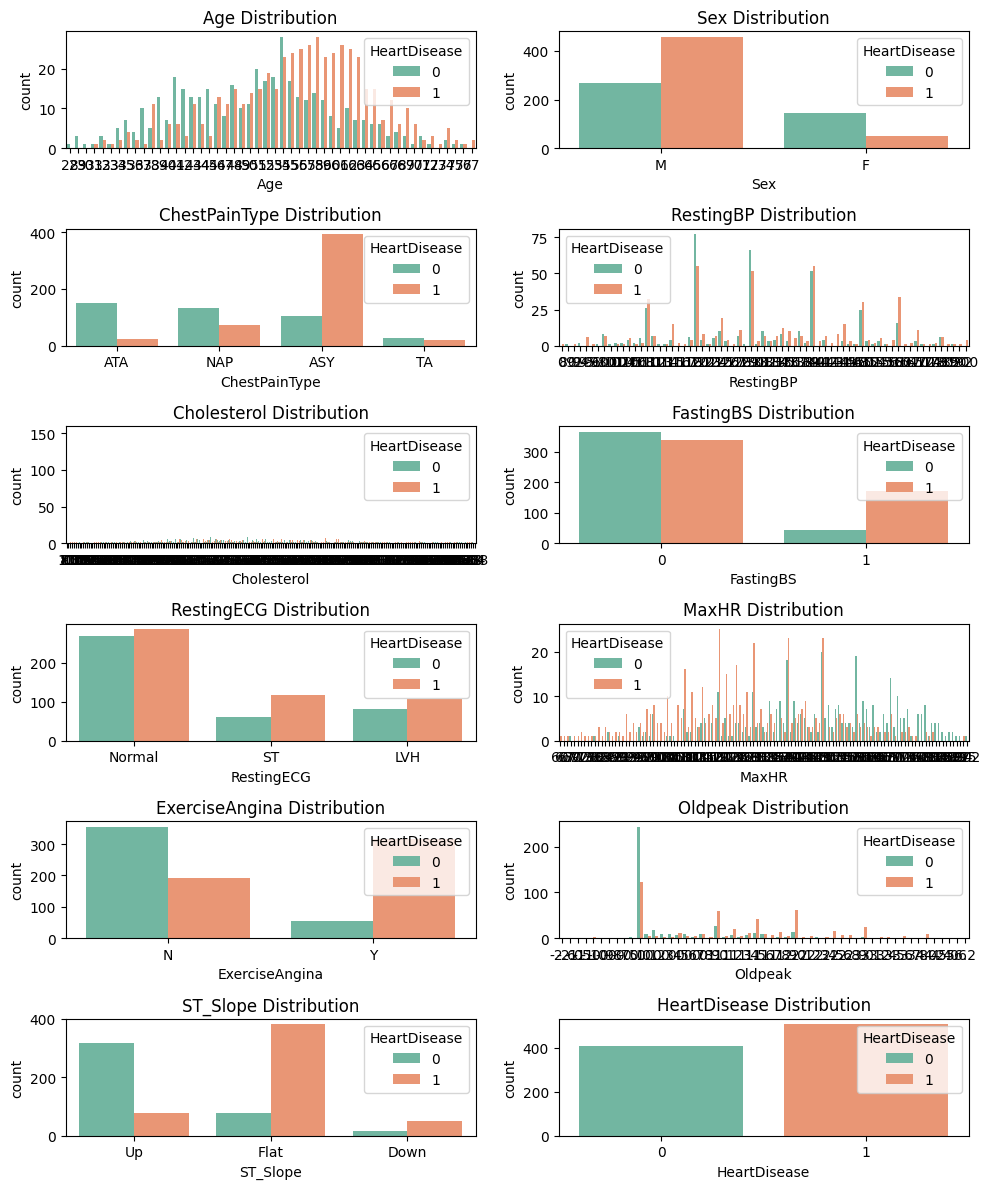

In [ ]:
visualizeData(data, visualizableFields = data.columns)

In [ ]:
data = encodingCategorialData(data)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
data = zscoringData(data)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0


##Corellation Visualization

<Axes: >

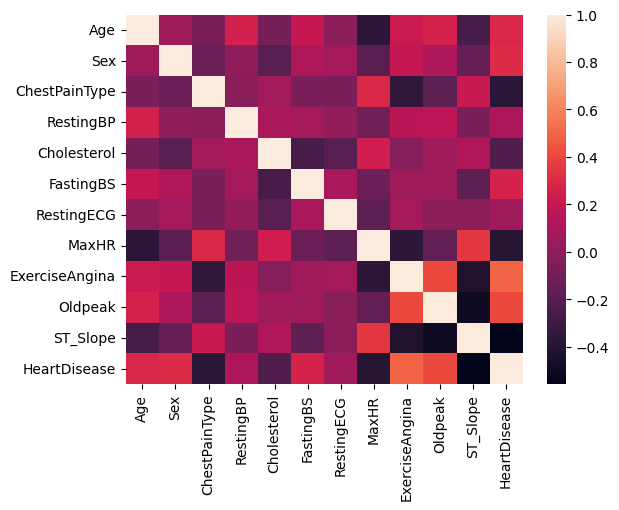

In [ ]:
sns.heatmap(data.corr())

In [ ]:
featuresT, labelsT = getFeaturesAndLabels(data)
train_data, test_data, train_labels, test_labels = train_test_split(featuresT, labelsT, shuffle = True, test_size = 0.2)
print(f'Train data: {len(train_data)} | Train labels: {len(train_labels)}')
print(f'Test data: {len(test_data)} | Test labels: {len(test_labels)}')

Train data: 734 | Train labels: 734
Test data: 184 | Test labels: 184


In [ ]:
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

batchsize = 32

train_dataloader = DataLoader(train_dataset, batch_size = batchsize, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = test_dataset.tensors[0].shape[0])

## Creating the Network

In [ ]:
def makeTheNet():

  class ANNnet(nn.Module):
    def __init__(self):
      super().__init__()

      self.input = nn.Linear(featuresT.shape[1], 256)

      self.fc1 = nn.Linear(256, 256)
      self.bn1 = nn.BatchNorm1d(256)

      self.fc2 = nn.Linear(256, 256)
      self.bn2 = nn.BatchNorm1d(256)

      self.fc3 = nn.Linear(256, 256)
      self.bn3 = nn.BatchNorm1d(256)
      self.output = nn.Linear(256, 1)

    def forward(self, x):
      x = self.input(x)
      x = F.leaky_relu(x)
      x = F.dropout(x, .5)

      x = self.fc1(x)
      x = self.bn1(x)
      x = F.leaky_relu(x)
      x = F.dropout(x, .5)

      x = self.fc2(x)
      x = self.bn2(x)
      x = F.leaky_relu(x)
      x = F.dropout(x, .5)

      x = self.fc3(x)
      x = self.bn3(x)
      x = F.leaky_relu(x)
      x = F.dropout(x, .5)

      return self.output(x)

  net = ANNnet()

  lossfun = nn.BCEWithLogitsLoss()

  optimizer = torch.optim.Adam(net.parameters(), lr = .0001)

  return net, lossfun, optimizer

In [ ]:
net, lossfun, optimizer = makeTheNet()

In [ ]:
X, y = next(iter(train_dataloader))
yHat = net(X)
lossfun(yHat, y)

tensor(0.6592, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

## Training the Network

In [ ]:
def functionToTrainNet():
  epochs = 1000

  net, lossfun, optimizer = makeTheNet()

  trainAcc = []
  trainLoss = []
  testAcc = []
  testLoss = []

  yTrue = []
  yPred = []

  for epochi in tqdm(range(epochs)):

    net.train()

    batchAcc = []
    batchLoss = []

    for X, y in train_dataloader:
      yHat = net(X)
      loss = lossfun(yHat, y)

      batchLoss.append(loss.item())
      batchAcc.append(torch.mean(((yHat > .0) == y).float()) * 100)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    trainAcc.append(np.mean(batchAcc))
    trainLoss.append(np.mean(batchLoss))

    net.eval()
    with torch.no_grad():
      X, y = next(iter(test_dataloader))
      yHat = net(X)
      loss = lossfun(yHat, y)

      yPred = (yHat > .0)
      yTrue = y

      testLoss.append(loss.item())
      testAcc.append(torch.mean((yPred == y).float()) * 100)

  return trainAcc, testAcc, trainLoss, testLoss, net, yTrue, yPred

In [ ]:
trainAcc, testAcc, trainLoss, testLoss, net, yTrue, yPred = functionToTrainNet()

100%|██████████| 1000/1000 [02:04<00:00,  8.03it/s]


## Plotting the results

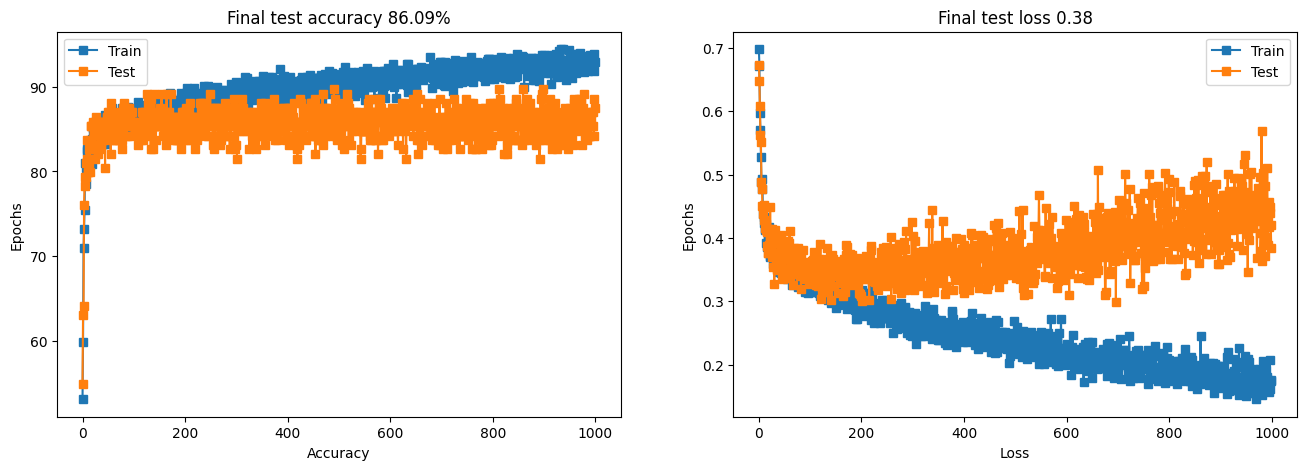

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainAcc, 's-', label = 'Train')
ax[0].plot(testAcc, 's-', label = 'Test')
ax[0].set_title(f'Final test accuracy {np.mean(testAcc[-10:]):.2f}%')
ax[0].set_xlabel('Accuracy')
ax[0].set_ylabel('Epochs')
ax[0].legend()

ax[1].plot(trainLoss, 's-', label = 'Train')
ax[1].plot(testLoss, 's-', label = 'Test')
ax[1].set_title(f'Final test loss {testLoss[-1]:.2f}')
ax[1].set_xlabel('Loss')
ax[1].set_ylabel('Epochs')
ax[1].legend()

plt.show()

## Visualising the Confussion Matrix

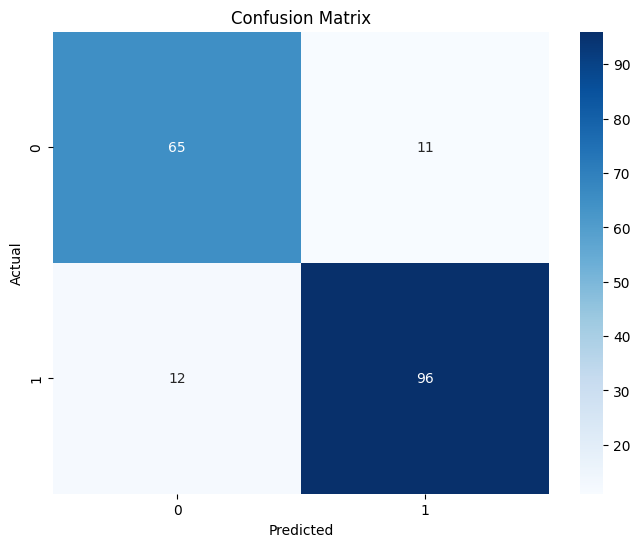

In [ ]:
cm = confusion_matrix(yTrue, yPred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
precision = precision_score(yTrue, yPred)
recall = recall_score(yTrue, yPred)
f1Score = f1_score(yTrue, yPred)

print(f'Precision {precision}')
print(f'Recall {recall}')
print(f'F1 Score {f1Score}')

Precision 0.897196261682243
Recall 0.8888888888888888
F1 Score 0.8930232558139535
